In [1]:
import pickle
import matplotlib.pyplot as plt 
import os, math
import umap
from matplotlib.font_manager import FontProperties

In [2]:
dataStorePath = '/storage/asim/Group_Hashing_Store/smallSize_store/UPdated_implement/'
dictdump = pickle.load(open(os.path.join(dataStorePath,"OPHash_hd_log.pkl"),"rb"))
dictdump_1 = pickle.load(open(os.path.join(dataStorePath,"DCH_hd_log.pkl"),"rb"))
dictdump_2 = pickle.load(open(os.path.join(dataStorePath,"HashNet_hd_log.pkl"),"rb"))
dictdump_4 = pickle.load(open(os.path.join(dataStorePath,"orthoHash_hd_log.pkl"),"rb"))

In [3]:
len(dictdump.values()), len(dictdump_1.keys()), len(dictdump_2.keys()),len(dictdump_4.keys()) 

(200, 200, 200, 200)

In [4]:
def plot_distance(dictdump, title):
    xaxis = [0]*(len(dictdump.keys()))
    yaxis = [0]*(len(dictdump.keys()))
    #yaxis2 = [0]*len(dictdump.keys())
    #print(len(yaxis))
    #print(len(dictdump.items()))
    for keys, value in dictdump.items():
        #print(keys)
        #print(value)
        yaxis[keys] = value
        xaxis[keys] = keys
        #yaxis.append(value)
        #xaxis.append(keys)
    #print(yaxis[0][0])
    type_1 = []
    type_2 = []
    type_3 = []
    for i in range(len(yaxis)):
        type_1.append(math.log(yaxis[i][0]))
        type_2.append(math.log(yaxis[i][1]))
        type_3.append(math.log(yaxis[i][2]))
        '''type_1.append((yaxis[i][0]))
        type_2.append((yaxis[i][1]))
        type_3.append((yaxis[i][2]))
'''

    '''plt.plot(xaxis, type_1, label="type 1", color ='tab:red', markersize=15) 
    plt.plot(xaxis, type_2, label="type 2", color ='tab:green', markersize=15) 
    plt.plot(xaxis, type_3, label="type 3", color ='tab:blue', markersize=15)'''

    plt.plot(xaxis, type_1, color ='tab:green', markersize=15) 
    plt.plot(xaxis, type_2, color ='tab:orange', markersize=15) 
    plt.plot(xaxis, type_3, color ='tab:red', markersize=15) 
    #plt.ylim([0, 64])
    plt.xlabel('Epoch', weight='bold', fontsize=20)
    plt.ylabel('Hamming distance', weight='bold', fontsize=20)
    plt.title(title, weight='bold', fontsize=20)
    plt.legend(fontsize=20)



In [5]:
import math
import matplotlib.pyplot as plt

def plot_distance(dictdump, title):
    xaxis = [0] * len(dictdump.keys())
    yaxis = [0] * len(dictdump.keys())

    for keys, value in dictdump.items():
        yaxis[keys] = value
        xaxis[keys] = keys

    type_1 = []
    type_2 = []
    type_3 = []

    for i in range(len(yaxis)):
        # Handle non-positive values by setting a minimum value (e.g., 1e-6) before taking the logarithm
        min_value = 1e-6  # Adjust this minimum value as needed
        type_1.append(math.log(max(yaxis[i][0], min_value)))
        type_2.append(math.log(max(yaxis[i][1], min_value)))
        type_3.append(math.log(max(yaxis[i][2], min_value)))

    plt.figure(figsize=(10, 6))

    plt.plot(xaxis, type_1, color='tab:green', markersize=15, label="type 1")
    plt.plot(xaxis, type_2, color='tab:orange', markersize=15, label="type 2")
    plt.plot(xaxis, type_3, color='tab:red', markersize=15, label="type 3")

    plt.xlabel('Epoch', weight='bold', fontsize=20)
    plt.ylabel('Log of Hamming distance', weight='bold', fontsize=20)
    plt.title(title, weight='bold', fontsize=20)
    plt.legend(fontsize=20)

    ax = plt.gca()
    ax.axvspan(0, 25, facecolor='lightblue', alpha=0.5)
    ax.axvspan(26, 150, facecolor='lightgreen', alpha=0.5)
    ax.axvspan(151, 200, facecolor='lightpink', alpha=0.5)

    '''plt.show()

# Example usage
dictdump = {i: [i, i + 1, i + 2] for i in range(201)}  # Replace this with your data
plot_distance(dictdump, 'Hamming Distance Plot')'''


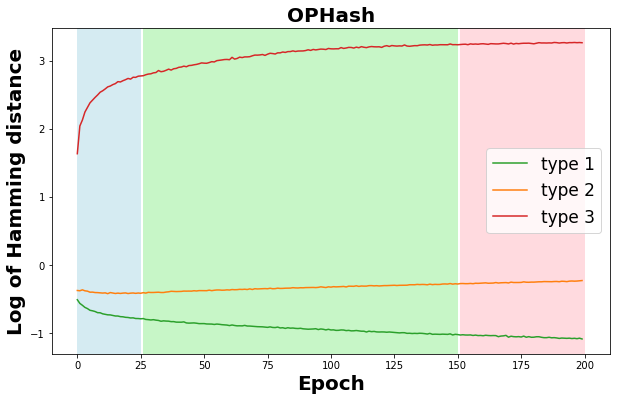

In [6]:
# Assuming you have two dictionaries `dictdump` and `dictdump_1`
# that you want to plot, you can call the function like this:
plot_distance(dictdump, "OPHash")

plt.legend(fontsize=17)
#plt.ylim([0, 1])
plt.show()

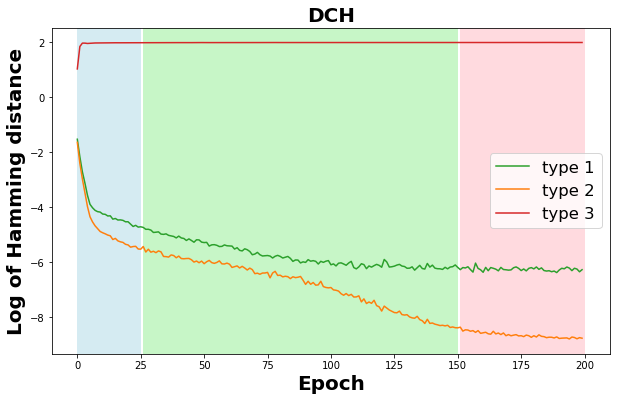

In [7]:
# Assuming you have two dictionaries `dictdump` and `dictdump_1`
# that you want to plot, you can call the function like this:
plot_distance(dictdump_1, "DCH")

plt.legend(fontsize=16.5)
#plt.ylim([0, 1])
plt.show()

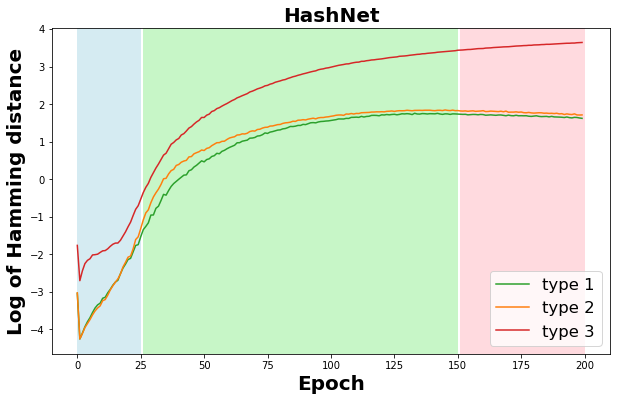

In [8]:
# Assuming you have two dictionaries `dictdump` and `dictdump_1`
# that you want to plot, you can call the function like this:
plot_distance(dictdump_2, "HashNet")

plt.legend(fontsize=16.5)
#plt.ylim([0, 1])
plt.show()

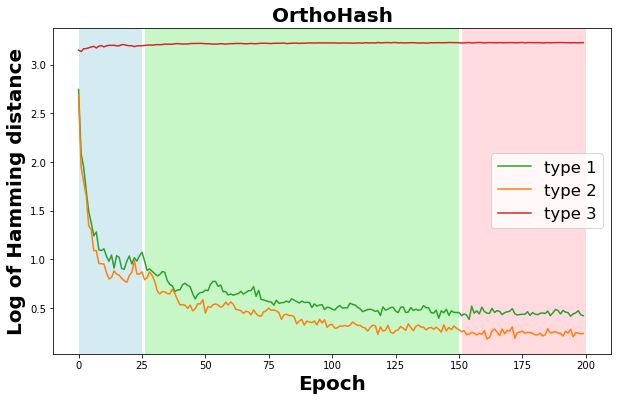

In [9]:
plot_distance(dictdump_4, "OrthoHash")

plt.legend(fontsize=16.5, loc='center right')
#plt.ylim([0, 1])
plt.show()

In [22]:
import torch
import os
import numpy as np
import random
import operator
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# torch.cuda.set_device(0)
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

from torchvision import transforms
from PIL import Image

from AlexNet import Encoder
from metrics import mAP, nDCG


random.seed(3407)
np.random.seed(3407)
torch.manual_seed(3407)
torch.cuda.manual_seed(3407)
torch.cuda.manual_seed_all(3407)



def relevenceClasses(sorted_pool,q_name):
    value = []
    for i in range(len(sorted_pool)):
        if ((q_name.split("_")[0]+'_'+q_name.split("_")[1]) ==(sorted_pool[i][0].split("_")[0]+'_'+sorted_pool[i][0].split("_")[1]) or (q_name.split("_")[2] == sorted_pool[i][0].split("_")[2])):
        
            value.append(1)
        elif (q_name.split("_")[1:3])== (sorted_pool[i][0].split("_")[1:3]):
            value.append(2)
        else:
            value.append(0)
    value2 = sorted(value, reverse=True)
    return value, value2

def hammingDistance(h1, h2):
    hash_code = h1.shape[1]
    h1norm = torch.div(h1, torch.norm(h1, p=2))
    h2norm = torch.div(h2, torch.norm(h2, p=2))
    distH = torch.pow(torch.norm(h1norm - h2norm, p=2), 2) * hash_code / 4
    return distH

def InnerHammingDistance(h1, h2):
    hash_code = h1.shape[1]
    inner_product = torch.sum(h1*h2, dim= 1)
    distH = (hash_code- inner_product)/2

    return distH

#### Hyperparemetr Details ######
hash_code = 48
#numClasses = len(classes)

#model load######################

medianet = Encoder(hash_code)

if torch.cuda.is_available():
    medianet.cuda()

model_name = f'OPHash_{hash_code}.pkl'
dataStorePath = '/storage/asim/Group_Hashing_Store/largeSize_datastore/Updated_implement/'
model_path = os.path.join(dataStorePath,model_name)
medianet.load_state_dict(torch.load(model_path))

print(model_path)
galleryfolderpath = "/storage/asim/Group_Hashing_Store/largeSize_updated_dataset/gallery"
queryfolderpath = "/storage/asim/Group_Hashing_Store/largeSize_updated_dataset/query"
gallery_files = os.listdir(galleryfolderpath)
gallery_files = random.sample(gallery_files, len(gallery_files))
query_files = os.listdir(queryfolderpath)
query_files = random.sample(query_files, len(query_files))
print(len(gallery_files))
querynumber = len((query_files))
print(querynumber)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

gallery = {}
print("\n\n Building Gallery .... \n")
with torch.no_grad():
    # Process each gallery image
    for img in gallery_files:
        image_path = os.path.join(galleryfolderpath, img)

        # Load and transform the image
        image = np.load(image_path)
        # transfer to one channel
        if len(image.shape)!= 2:
            image = np.mean(image,axis=-1)

        image = Image.fromarray(image)
        tensor_image = transform(image).unsqueeze(0).cuda()

        # Pass the tensor through the medianet model
        h, _ = medianet(tensor_image)

        # Store the result in the gallery dictionary
        gallery[img] = torch.sign(h)

        # Clean up
        del tensor_image
    print("\n Building Complete. \n")

Using PyTorch version: 1.10.0 CUDA: True
/storage/asim/Group_Hashing_Store/largeSize_datastore/Updated_implement/OPHash_48.pkl
5164
1300


 Building Gallery .... 


 Building Complete. 



### top retrieval

In [69]:
#q_name = '/storage/asim/Group_Hashing_Store/largeSize_updated_dataset/query/Brain_MRI_glioma_724.npy'
q_name = '/storage/asim/Group_Hashing_Store/largeSize_updated_dataset/query/Breast_US_benign_263.npy'
#q_name = '/storage/asim/Group_Hashing_Store/largeSize_updated_dataset/query/Chest_X-ray_COVID_6082.npy'
#q_name = '/storage/asim/Group_Hashing_Store/largeSize_updated_dataset/query/Retina_OCT_CNV_2364.npy'

query_image = os.path.join(queryfolderpath, q_name)
np_im_q =np.load(query_image)
im_q = np.resize(np_im_q ,(224, 224))
numpy_image_q = np.array(im_q)
if(len(numpy_image_q.shape) < 3): numpy_image_q = np.stack((numpy_image_q,)*1, axis=-1)
numpy_image_q = (numpy_image_q.transpose((2, 0, 1)))
numpy_image_q = np.array([numpy_image_q])
torch_image_q = torch.from_numpy(numpy_image_q)
torch_image_q = torch_image_q.type("torch.cuda.FloatTensor")
#print(torch_image_q.size())
h_q, _ = medianet(torch_image_q)
#h_q = torch.sign(h_q)
#h_q1, _ = model(torch_image_q)
            
dist = {}
for key in gallery.keys():
    h1 = gallery[key]
    h1norm = torch.div(h1, torch.norm(torch.sgn(h1), p=2))
    h2norm = torch.div(h_q, torch.norm(torch.sgn(h_q), p=2))
    dist[key] = torch.pow(torch.norm(h1norm - h2norm, p=2), 2)*hash_code/4

In [68]:
sorted_pool_10 = sorted(dist.items(), key=operator.itemgetter(1))[0:15]
sorted_pool_10

[('Brain_MRI_meningioma_138.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_glioma_2473.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_glioma_1081.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_glioma_2162.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_glioma_648.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_meningioma_613.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_meningioma_670.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_meningioma_2295.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_meningioma_941.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_glioma_1451.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Brain_MRI_glioma_1372.npy',
  tensor(0.0011, device='cuda:0', grad_fn=<D

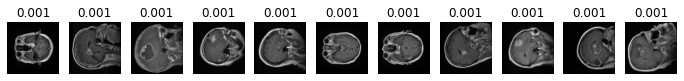

In [66]:
num_images = len(sorted_pool_10)
fig, axs = plt.subplots(1, num_images, figsize=(12, 4))
for i in range(len(sorted_pool_10)):
    #if i!=1 and i!=1:
        image = os.path.join(galleryfolderpath, sorted_pool_10[i][0])
        image = np.load(image)
        axs[i].imshow(image, 'gray')
        axs[i].axis("off")
        axs[i].set_title(round(sorted_pool_10[i][1].item(), 3))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

In [70]:
sorted_pool_10 = sorted(dist.items(), key=operator.itemgetter(1))[0:11]
sorted_pool_10

[('Chest_X-ray_PNEUMONIA_2990.npy',
  tensor(1.5529, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Chest_X-ray_PNEUMONIA_1052.npy',
  tensor(1.5529, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Chest_X-ray_PNEUMONIA_3227.npy',
  tensor(1.5529, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Breast_US_benign_164.npy',
  tensor(1.5895, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Breast_US_Bnormal_70.npy',
  tensor(1.5895, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Retina_OCT_DME_3065.npy',
  tensor(1.5895, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Chest_X-ray_COVID_8962.npy',
  tensor(1.9360, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Chest_X-ray_PNEUMONIA_1859.npy',
  tensor(1.9360, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Chest_X-ray_COVID_8708.npy',
  tensor(1.9360, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Chest_X-ray_ChestNormal_1212.npy',
  tensor(2.3910, device='cuda:0', grad_fn=<DivBackward0>)),
 ('Chest_X-ray_PNEUMONIA_5778.npy',
  tensor(2.3910, device='cuda

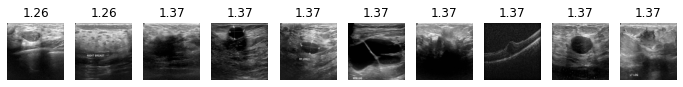

In [60]:
sorted_pool_10.remove(sorted_pool_10[2])
num_images = len(sorted_pool_10)
fig, axs = plt.subplots(1, num_images, figsize=(12, 4))
for i in range(len(sorted_pool_10)):
    #if i!=1 and i!=1:
        image = os.path.join(galleryfolderpath, sorted_pool_10[i][0])
        image = np.load(image)
        axs[i].imshow(image, 'gray')
        axs[i].axis("off")
        axs[i].set_title(round(sorted_pool_10[i][1].item(), 2))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

(-0.5, 223.5, 223.5, -0.5)

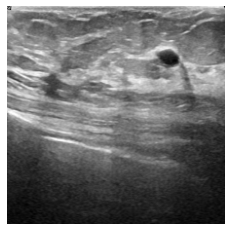

In [62]:
plt.imshow(np.load(q_name), 'gray')
plt.axis('off')

In [56]:
round(sorted_pool_10[2][1].item(), 2)

1.37

In [2]:
hash_array = []
label_array = []
import numpy as np
for key, value in gallery.items():
    hash_array.append(np.squeeze(value.cpu().data.numpy()))
    key1 = key.split('_')[0] + '_' + key.split('_')[1] + '_'+  key.split('_')[2]
    label_array.append(key1)
hash_array = np.array(hash_array)
label_array = np.array(label_array)
label_unique_array = np.unique(label_array)
hash_array.shape, label_array.shape

((5164, 48), (5164,))

In [5]:
label_dict={}

for i in range(len(label_unique_array)):
    label_dict[label_unique_array[i]]=i
label_dict

{'Brain_MRI_glioma': 0,
 'Brain_MRI_meningioma': 1,
 'Brain_MRI_pituitaryTumor': 2,
 'Breast_US_Bnormal': 3,
 'Breast_US_benign': 4,
 'Breast_US_malignant': 5,
 'Chest_X-ray_COVID': 6,
 'Chest_X-ray_ChestNormal': 7,
 'Chest_X-ray_PNEUMONIA': 8,
 'Retina_OCT_CNV': 9,
 'Retina_OCT_DME': 10,
 'Retina_OCT_DRUSEN': 11,
 'Retina_OCT_NORMAL': 12}

In [6]:
new_labels=[]
for i in list(label_array):
    new_labels.append(label_dict[i])

In [7]:
new_labels = np.asarray(new_labels)
new_labels

array([11,  7,  8, ...,  9,  0,  7])

/home/asim/.conda/envs/asimenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/asim/.conda/envs/asimenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


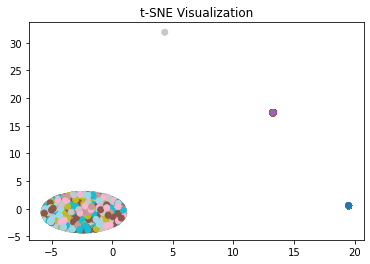

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming you have your input vectors and labels stored as numpy arrays
input_vectors = hash_array#np.random.random((5164, 48))  # Replace with your actual input vectors
labels = new_labels#np.random.randint(0, 13, (5164,))  # Replace with your actual labels

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_vectors = tsne.fit_transform(input_vectors)

# Create a scatter plot of the t-SNE results with color-coded labels
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c=labels, cmap='tab20')

# Set the number of colors in the colormap
num_labels = 13

'''# Create a colorbar legend
cbar = plt.colorbar(ticks=np.arange(num_labels))
cbar.set_label('Labels')
'''
# Set plot title and labels
plt.title('t-SNE Visualization')
'''plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')'''

# Show the plot
plt.show()


In [3]:
label_dict={}

for i in range(len(label_unique_array)):
    label_dict[label_unique_array[i]]=i
label_dict

{'Brain_MRI_glioma': 0,
 'Brain_MRI_meningioma': 1,
 'Brain_MRI_pituitaryTumor': 2,
 'Breast_US_Bnormal': 3,
 'Breast_US_benign': 4,
 'Breast_US_malignant': 5,
 'Chest_X-ray_COVID': 6,
 'Chest_X-ray_ChestNormal': 7,
 'Chest_X-ray_PNEUMONIA': 8,
 'Retina_OCT_CNV': 9,
 'Retina_OCT_DME': 10,
 'Retina_OCT_DRUSEN': 11,
 'Retina_OCT_NORMAL': 12}

In [4]:
new_labels=[]
for i in list(label_array):
    new_labels.append(label_dict[i])

In [5]:
new_labels = np.asarray(new_labels)
new_labels

array([11,  7,  8, ...,  9,  0,  7])

In [8]:
embedding = umap.UMAP().fit_transform(hash_array, y=new_labels)

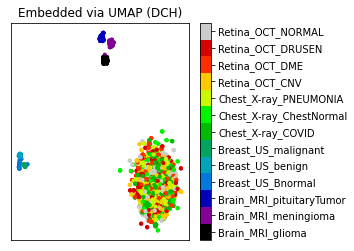

In [10]:
fig, ax = plt.subplots(1, figsize=(4,4))
plt.scatter(*embedding.T, s=10, c=new_labels, cmap=plt.cm.nipy_spectral, alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(14)-0.5)
cbar.set_ticks(np.arange(14))
cbar.set_ticklabels(label_unique_array)
plt.title('Embedded via UMAP (DCH)');

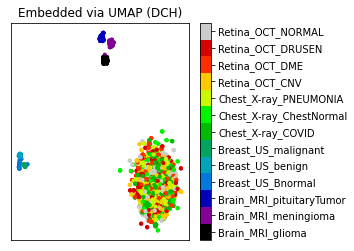

In [12]:
fig, ax = plt.subplots(1, figsize=(4,4))
plt.scatter(*embedding.T, s=10, c=new_labels, cmap=plt.cm.nipy_spectral, alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(14)-0.5)
cbar.set_ticks(np.arange(14))
cbar.set_ticklabels(label_unique_array)
plt.title('Embedded via UMAP (DCH)');

#### Radar Char plot


/tmp/ipykernel_285956/4248744811.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories)


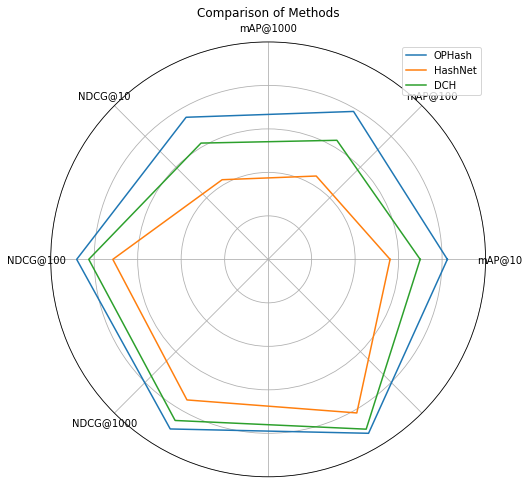

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
methods = ['OPHash', 'HashNet', 'DCH']
mAP_10 = [0.824235267, 0.56080314, 0.69921398]
mAP_100 = [0.785490681, 0.442514982, 0.632322346]
mAP_1000 = [0.75458778, 0.422957436, 0.617439443]
NDCG_10 = [0.880554111, 0.714318154, 0.82499733]
NDCG_100 = [0.900658965, 0.746507281, 0.855583862]
NDCG_1000 = [0.923639317, 0.815589725, 0.901758479]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
plt.title('Comparison of Methods')

# Set number of variables and angles
categories = ['mAP@10', 'mAP@100', 'mAP@1000', 'NDCG@10', 'NDCG@100', 'NDCG@1000']
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


# Plot each method
for i, method in enumerate(methods):
    values = mAP_10[i], mAP_100[i], mAP_1000[i], NDCG_10[i], NDCG_100[i], NDCG_1000[i]
    values += values[:1]
    
    ax.plot(angles, values, label=method)

# Add legend and fill area
#ax.fill(angles, [1] * len(angles), alpha=0.1)
ax.legend(loc='upper right')

# Set axis labels
#ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set axis limits
ax.set_yticklabels([])
ax.set_ylim([0, 1])

# Display the chart
plt.show()
